**Importing Libraries**

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Dataset**

In [44]:
data=pd.read_csv('/content/diabetes (1).csv')

In [45]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [47]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [48]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [49]:
# Replace zeros with NaN
data.loc[:, data.columns != 'Outcome'] = data.loc[:, data.columns != 'Outcome'].replace(0, np.nan)

In [50]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [51]:
data.isna().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

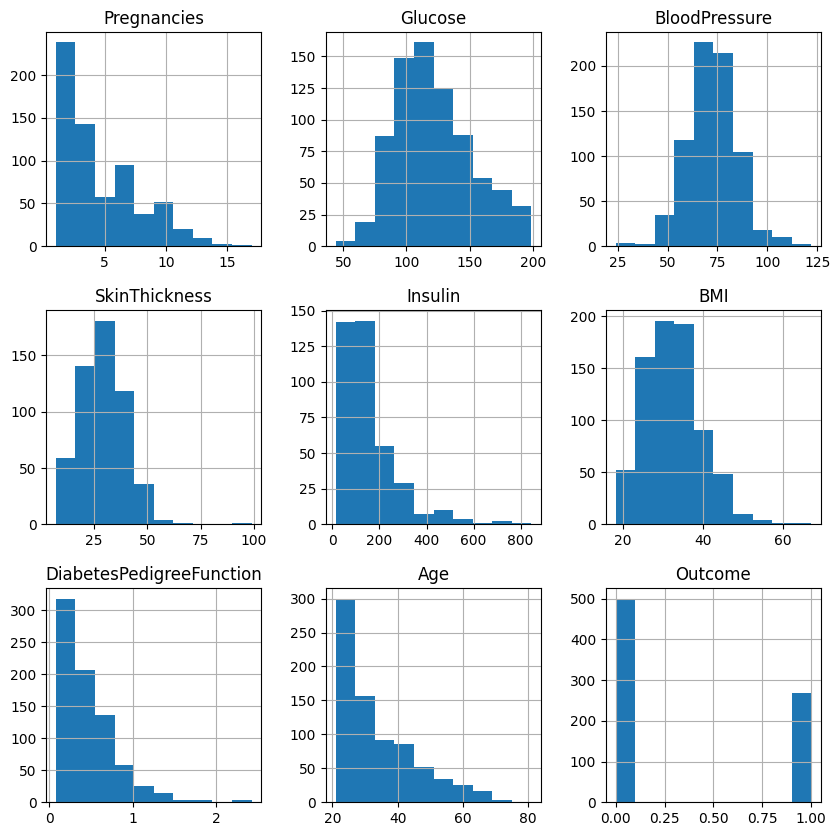

In [52]:
#plotiing
data.hist(figsize = (10,10))
plt.show()

In [53]:
#replacing nan values
data['Pregnancies'].fillna(data['Pregnancies'].median(), inplace = True)
data['Glucose'].fillna(data['Glucose'].mean(), inplace = True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace = True)
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace = True)
data['Insulin'].fillna(data['Insulin'].median(), inplace = True)
data['BMI'].fillna(data['BMI'].median(), inplace = True)

In [54]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [55]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

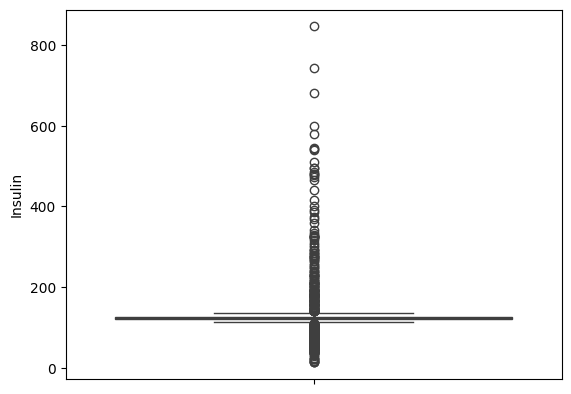

In [56]:
# boxplot of insulin

sns.boxplot(data['Insulin'])
plt.show()


In [57]:
#outlier handling for Insulin

Q1 = data['Insulin'].quantile(0.25)
Q3 = data['Insulin'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

def limt_imputer(value):
  if value>upper_limit:
    return upper_limit
  if value<lower_limit:
    return lower_limit
  else:
       return value

#applying the imputer function
data['Insulin']=data['Insulin'].apply(limt_imputer)


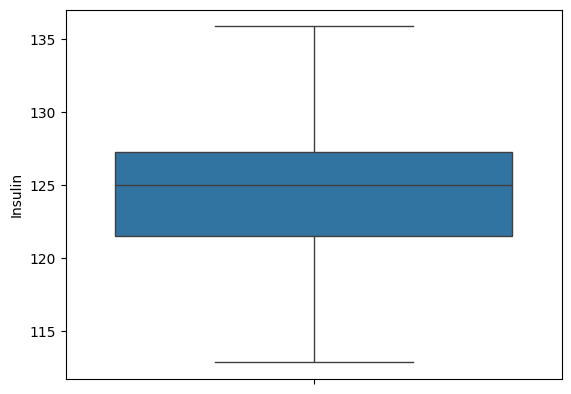

In [58]:
# boxplot of insulin

sns.boxplot(data['Insulin'])
plt.show()

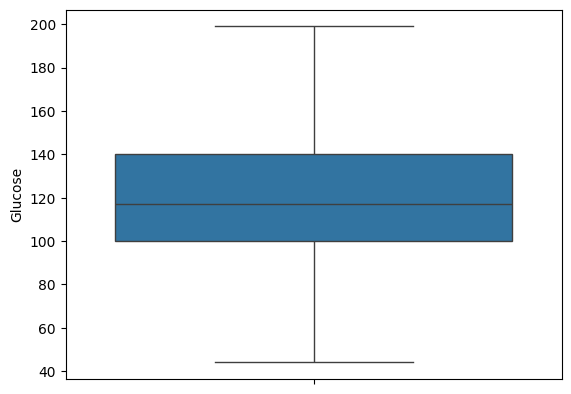

In [59]:
# Boxplot of Glucose
sns.boxplot(data['Glucose'])
plt.show()

In [60]:
# correlation of outcome with other variables

data.corr()['Outcome'].sort_values(ascending=False)


Outcome                     1.000000
Glucose                     0.492928
BMI                         0.312038
Insulin                     0.266382
Pregnancies                 0.248172
Age                         0.238356
SkinThickness               0.214873
DiabetesPedigreeFunction    0.173844
BloodPressure               0.166074
Name: Outcome, dtype: float64

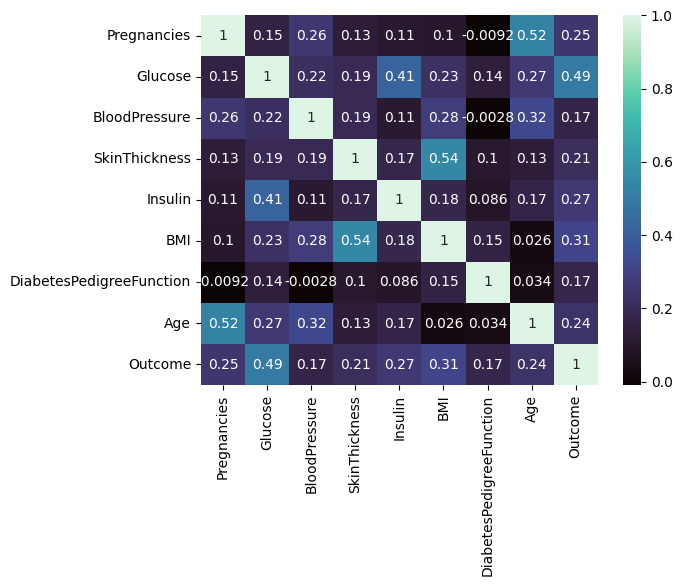

<Figure size 1000x900 with 0 Axes>

In [61]:
#heatmap
sns.heatmap(data.corr(),annot=True,cmap ='mako')
plt.figure(figsize=(10,9))
plt.show()

In [62]:
#Splitting the dataset
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [63]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,125.000,33.6,0.627,50
1,1.0,85.0,66.0,29.0,125.000,26.6,0.351,31
2,8.0,183.0,64.0,29.0,125.000,23.3,0.672,32
3,1.0,89.0,66.0,23.0,112.875,28.1,0.167,21
4,4.0,137.0,40.0,35.0,135.875,43.1,2.288,33


In [64]:
#train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [65]:
X_train.shape

(614, 8)

In [66]:
X_test.shape

(154, 8)

In [67]:
#applying standard scaler
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [68]:
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.fit_transform(X_test)

In [69]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
model1= LogisticRegression()

In [70]:
model1.fit(X_train_scaled,y_train)

LogisticRegression()

In [71]:
pred1= model1.predict(X_test_scaled)

In [138]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [73]:
#checking prediction
accuracy = accuracy_score(y_test, pred1)
confusion = confusion_matrix(y_test, pred1)
classification_report = classification_report(y_test, pred1)
f1_score= f1_score(y_test, pred1)

print("Accuracy:", accuracy)
print("Confusion matrix:",confusion )
print("Classification report:", classification_report)
print("f1_score:", f1_score)

Accuracy: 0.7792207792207793
Confusion matrix: [[86 13]
 [21 34]]
Classification report:               precision    recall  f1-score   support

           0       0.80      0.87      0.83        99
           1       0.72      0.62      0.67        55

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154

f1_score: 0.6666666666666667


In [130]:
# LogisticRegression without scaling
model2= LogisticRegression()

In [131]:
model2.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [132]:
pred2= model1.predict(X_test_scaled)

In [135]:
#checking prediction
accuracy = accuracy_score(y_test, pred2)
confusion = confusion_matrix(y_test, pred2)
classification_report = classification_report(y_test, pred2)
f1_score= f1_score(y_test, pred2)

print("Accuracy:", accuracy)
print("Confusion matrix:",confusion )
print("Classification report:", classification_report)
print("f1_score:", f1_score)

Accuracy: 0.7792207792207793
Confusion matrix: [[86 13]
 [21 34]]
Classification report:               precision    recall  f1-score   support

           0       0.80      0.87      0.83        99
           1       0.72      0.62      0.67        55

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154

f1_score: 0.6666666666666667


In [74]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

In [95]:
metric_k=[]
n=np.arange(3,15)

for k in n:
  classifier = KNeighborsClassifier(n_neighbors= k, metric= 'euclidean')
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  acc = accuracy_score(y_test,y_pred)
  metric_k.append(acc)

In [96]:
metric_k

[0.7077922077922078,
 0.7402597402597403,
 0.7402597402597403,
 0.7337662337662337,
 0.6883116883116883,
 0.7402597402597403,
 0.6948051948051948,
 0.7532467532467533,
 0.7207792207792207,
 0.7142857142857143,
 0.7077922077922078,
 0.7402597402597403]

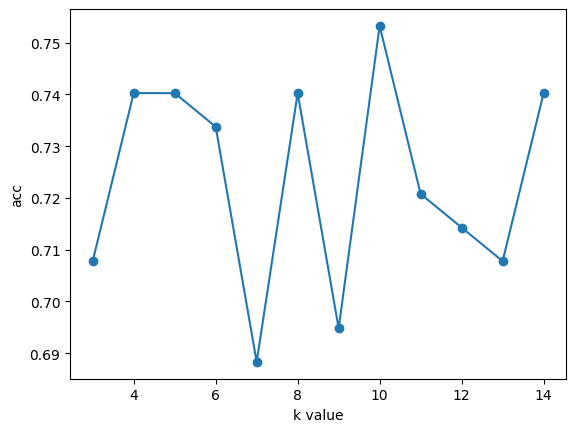

In [97]:
plt.plot(n,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('acc')
plt.show()

In [98]:
classifier = KNeighborsClassifier(n_neighbors= 10, metric= 'euclidean')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [101]:
#checking accuracy
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
f1_score= f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion matrix:",confusion )
print("Classification report:", classification_report)
print("f1_score:", f1_score)

Accuracy: 0.7532467532467533
Confusion matrix: [[82 17]
 [21 34]]
Classification report:               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154

f1_score: 0.6415094339622642


In [102]:
from sklearn.svm import SVC

In [108]:
sv=SVC(kernel= 'linear')

In [109]:
sv.fit(X_train,y_train)

SVC(kernel='linear')

In [110]:
y_pred=sv.predict(X_test)

In [114]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
f1_score= f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion matrix:",confusion )
print("Classification report:", classification_report)
print("f1_score:", f1_score)

Accuracy: 0.7662337662337663
Confusion matrix: [[83 16]
 [20 35]]
Classification report:               precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154

f1_score: 0.660377358490566


In [115]:
sv= SVC(kernel='poly',degree=3)

In [118]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
f1_score= f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion matrix:",confusion )
print("Classification report:", classification_report)
print("f1_score:", f1_score)

Accuracy: 0.7662337662337663
Confusion matrix: [[83 16]
 [20 35]]
Classification report:               precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154

f1_score: 0.660377358490566


In [119]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB

In [120]:
bay = GaussianNB()

In [121]:
#Model Training
bay.fit(X_train,y_train)

GaussianNB()

In [122]:
nb_pred = bay.predict(X_test)

In [125]:
accuracy = accuracy_score(y_test, nb_pred)
confusion = confusion_matrix(y_test, nb_pred)
classification_report = classification_report(y_test, nb_pred)
f1_score= f1_score(y_test, nb_pred)

print("Accuracy:", accuracy)
print("Confusion matrix:",confusion )
print("Classification report:", classification_report)
print("f1_score:", f1_score)

Accuracy: 0.7142857142857143
Confusion matrix: [[73 26]
 [18 37]]
Classification report:               precision    recall  f1-score   support

           0       0.80      0.74      0.77        99
           1       0.59      0.67      0.63        55

    accuracy                           0.71       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.73      0.71      0.72       154

f1_score: 0.6271186440677966


In [136]:
nb_pred = bay.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [139]:
#checking accuracy
accuracy = accuracy_score(y_test, nb_pred)
confusion = confusion_matrix(y_test, nb_pred)
classification_report = classification_report(y_test, nb_pred)
f1_score= f1_score(y_test, nb_pred)

print("Accuracy:", accuracy)
print("Confusion matrix:",confusion )
print("Classification report:", classification_report)
print("f1_score:", f1_score)

Accuracy: 0.6428571428571429
Confusion matrix: [[99  0]
 [55  0]]
Classification report:               precision    recall  f1-score   support

           0       0.64      1.00      0.78        99
           1       0.00      0.00      0.00        55

    accuracy                           0.64       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.41      0.64      0.50       154

f1_score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
